In [27]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import math
import re

import pandas as pd
from pandas.tseries.offsets import DateOffset
import numpy as np

from datetime import date, timedelta
import plotly.offline as ply
import plotly.graph_objs as go
from plotly.tools import make_subplots
import plotly.express as px

ply.init_notebook_mode(connected=True)

from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.preprocessing import StandardScaler # used for feature scaling


import plotly.graph_objects as go
%matplotlib inline

In [28]:
#Загружаем данные
data = pd.read_csv("airbnb_prep.csv", header = 0, sep=';')

In [29]:
df = data.copy()

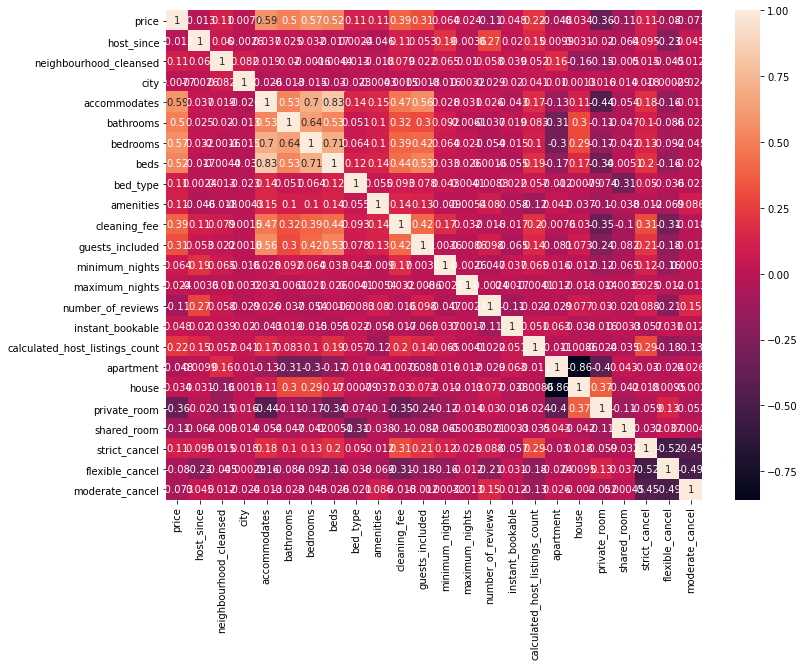

In [30]:
# Cheking correlations
import seaborn as sns
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, annot=True)
plt.show()

Переменные price,accommodates,bathrooms,bedrooms,beds, apartment,house,strict_cancel, flexible_cancel, moderate_cancel     (0,4,5,6,7,17,18,21,22,23) имеют коэфициенты корреляции больше 0,5. Поєтому они и будут рассматриваться в качестве факторов для дальнейшей кластеризации. 

In [16]:
for i in range(len(df.columns)):
    print(i, df.columns[i])

0 price
1 host_since
2 neighbourhood_cleansed
3 city
4 accommodates
5 bathrooms
6 bedrooms
7 beds
8 bed_type
9 amenities
10 cleaning_fee
11 guests_included
12 minimum_nights
13 maximum_nights
14 number_of_reviews
15 instant_bookable
16 calculated_host_listings_count
17 apartment
18 house
19 private_room
20 shared_room
21 strict_cancel
22 flexible_cancel
23 moderate_cancel


In [32]:
df = df.iloc[:, [0,4,5,6,7,17,18,21,22,23]]

In [33]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler().fit(df)
df = sc.transform(df)
df = pd.DataFrame(df)

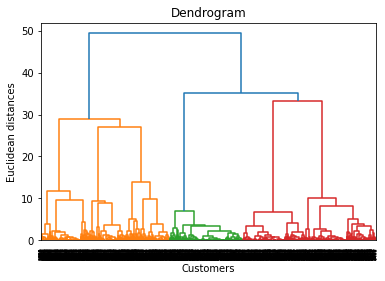

In [19]:
# Using the dendrogram to find the optimal number of clusters
# На всіх змінних
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [96]:
# Fitting Hierarchical Clustering to the dataset
from sklearn.cluster import AgglomerativeClustering
hc2 = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward').fit_predict(df)
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward').fit_predict(df)

## K-Means Clustering

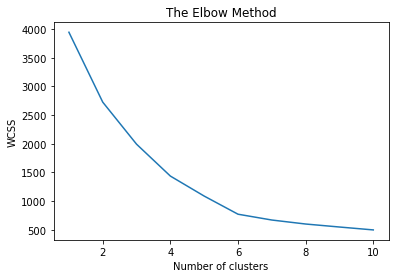

In [21]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

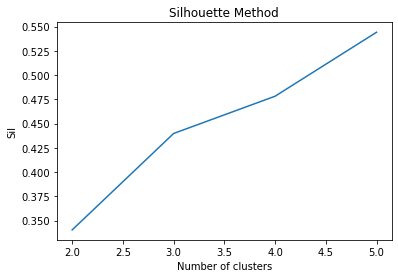

2:0.340420409278533
3:0.43983393066928195
4:0.4782369942952697
5:0.5441874183547376


In [22]:

# Using the silhouette method to find the optimal number of clusters
from sklearn.metrics import silhouette_score

sil = []

for k in range(2, 6):
  kmeans = KMeans(n_clusters = k).fit(df)  
  preds = kmeans.fit_predict(df)
  sil.append(silhouette_score(df, preds, metric = 'euclidean'))


plt.plot(range(2, 6), sil)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sil')
plt.show()

for i in range(len(sil)):
 print(str(i+2) +":"+ str(sil[i]))

In [97]:

# Fitting K-Means to the dataset
km2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters =2, random_state = 0).fit(df)
res = pd.DataFrame(kms.cluster_centers_, columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'apartment',
       'house', 'strict_cancel', 'flexible_cancel', 'moderate_cancel']).round(3)

In [98]:
res = sc.inverse_transform(res)

In [99]:
res = pd.DataFrame(res, columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'apartment',
       'house', 'strict_cancel', 'flexible_cancel', 'moderate_cancel'])
res

,price,accommodates,bathrooms,bedrooms,beds,apartment,house,strict_cancel,flexible_cancel,moderate_cancel
0,140.517313,2.965803,1.112073,1.012120,1.480997,1.0,-0.000,0.314,0.353,0.304
1,150.422644,3.446886,1.428516,1.475231,1.825783,-0.0,0.819,0.342,0.378,0.280


In [100]:

# Fitting K-Means to the dataset
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 0).fit_predict(df)
kms = KMeans(n_clusters =3, random_state = 0).fit(df)
res = pd.DataFrame(kms.cluster_centers_, columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'apartment',
       'house', 'strict_cancel', 'flexible_cancel', 'moderate_cancel']).round(3)
res = sc.inverse_transform(res)
res = pd.DataFrame(res, columns = ['price', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'apartment',
       'house', 'strict_cancel', 'flexible_cancel', 'moderate_cancel'])
res

,price,accommodates,bathrooms,bedrooms,beds,apartment,house,strict_cancel,flexible_cancel,moderate_cancel
0,160.327976,3.621071,1.307966,1.333310,1.889632,0.594,0.327,1.0,0.0,-0.000
1,133.525314,2.766735,1.178375,1.101754,1.408635,0.599,0.321,-0.0,1.0,-0.000
2,139.934646,3.115105,1.223581,1.150306,1.561873,0.655,0.296,-0.0,0.0,0.944


In [101]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,km2)

1.0

In [102]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3,km3)

0.2571191685034483

## SOM

In [69]:
# Less features
X1 = df.loc[:, [0, 5, 6,7,8,9]].values

In [70]:
import SimpSOM as sps
np.random.seed(605891282)
net = sps.somNet(18, 25, X1, PBC=True)
net.train(0.01, 10000)
#net.save(‘filename_weights’)

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


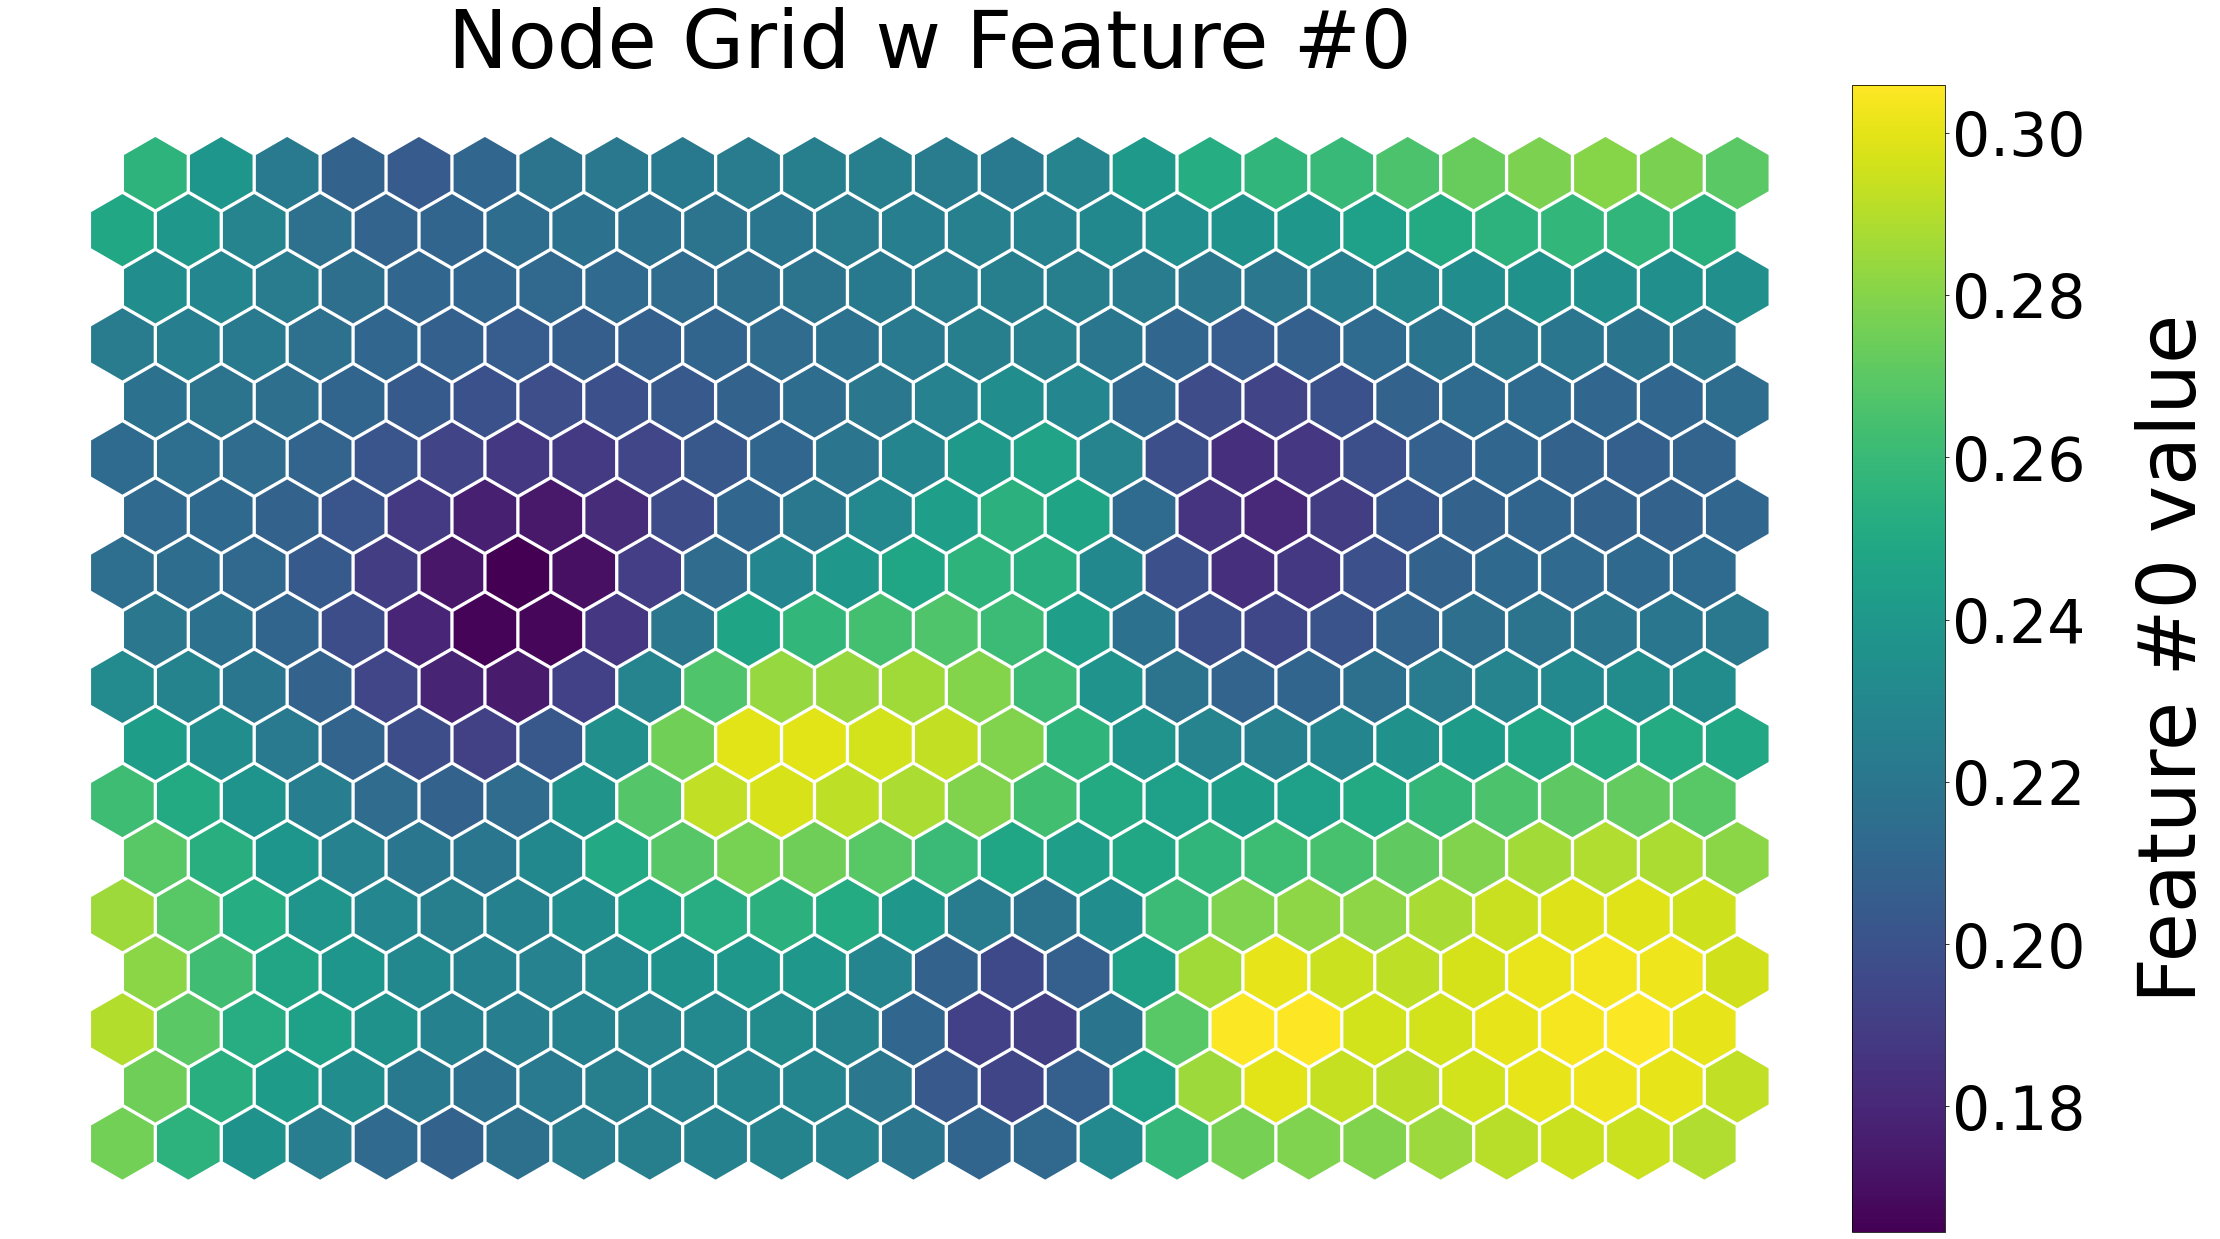

In [71]:
net.nodes_graph(colnum=0)

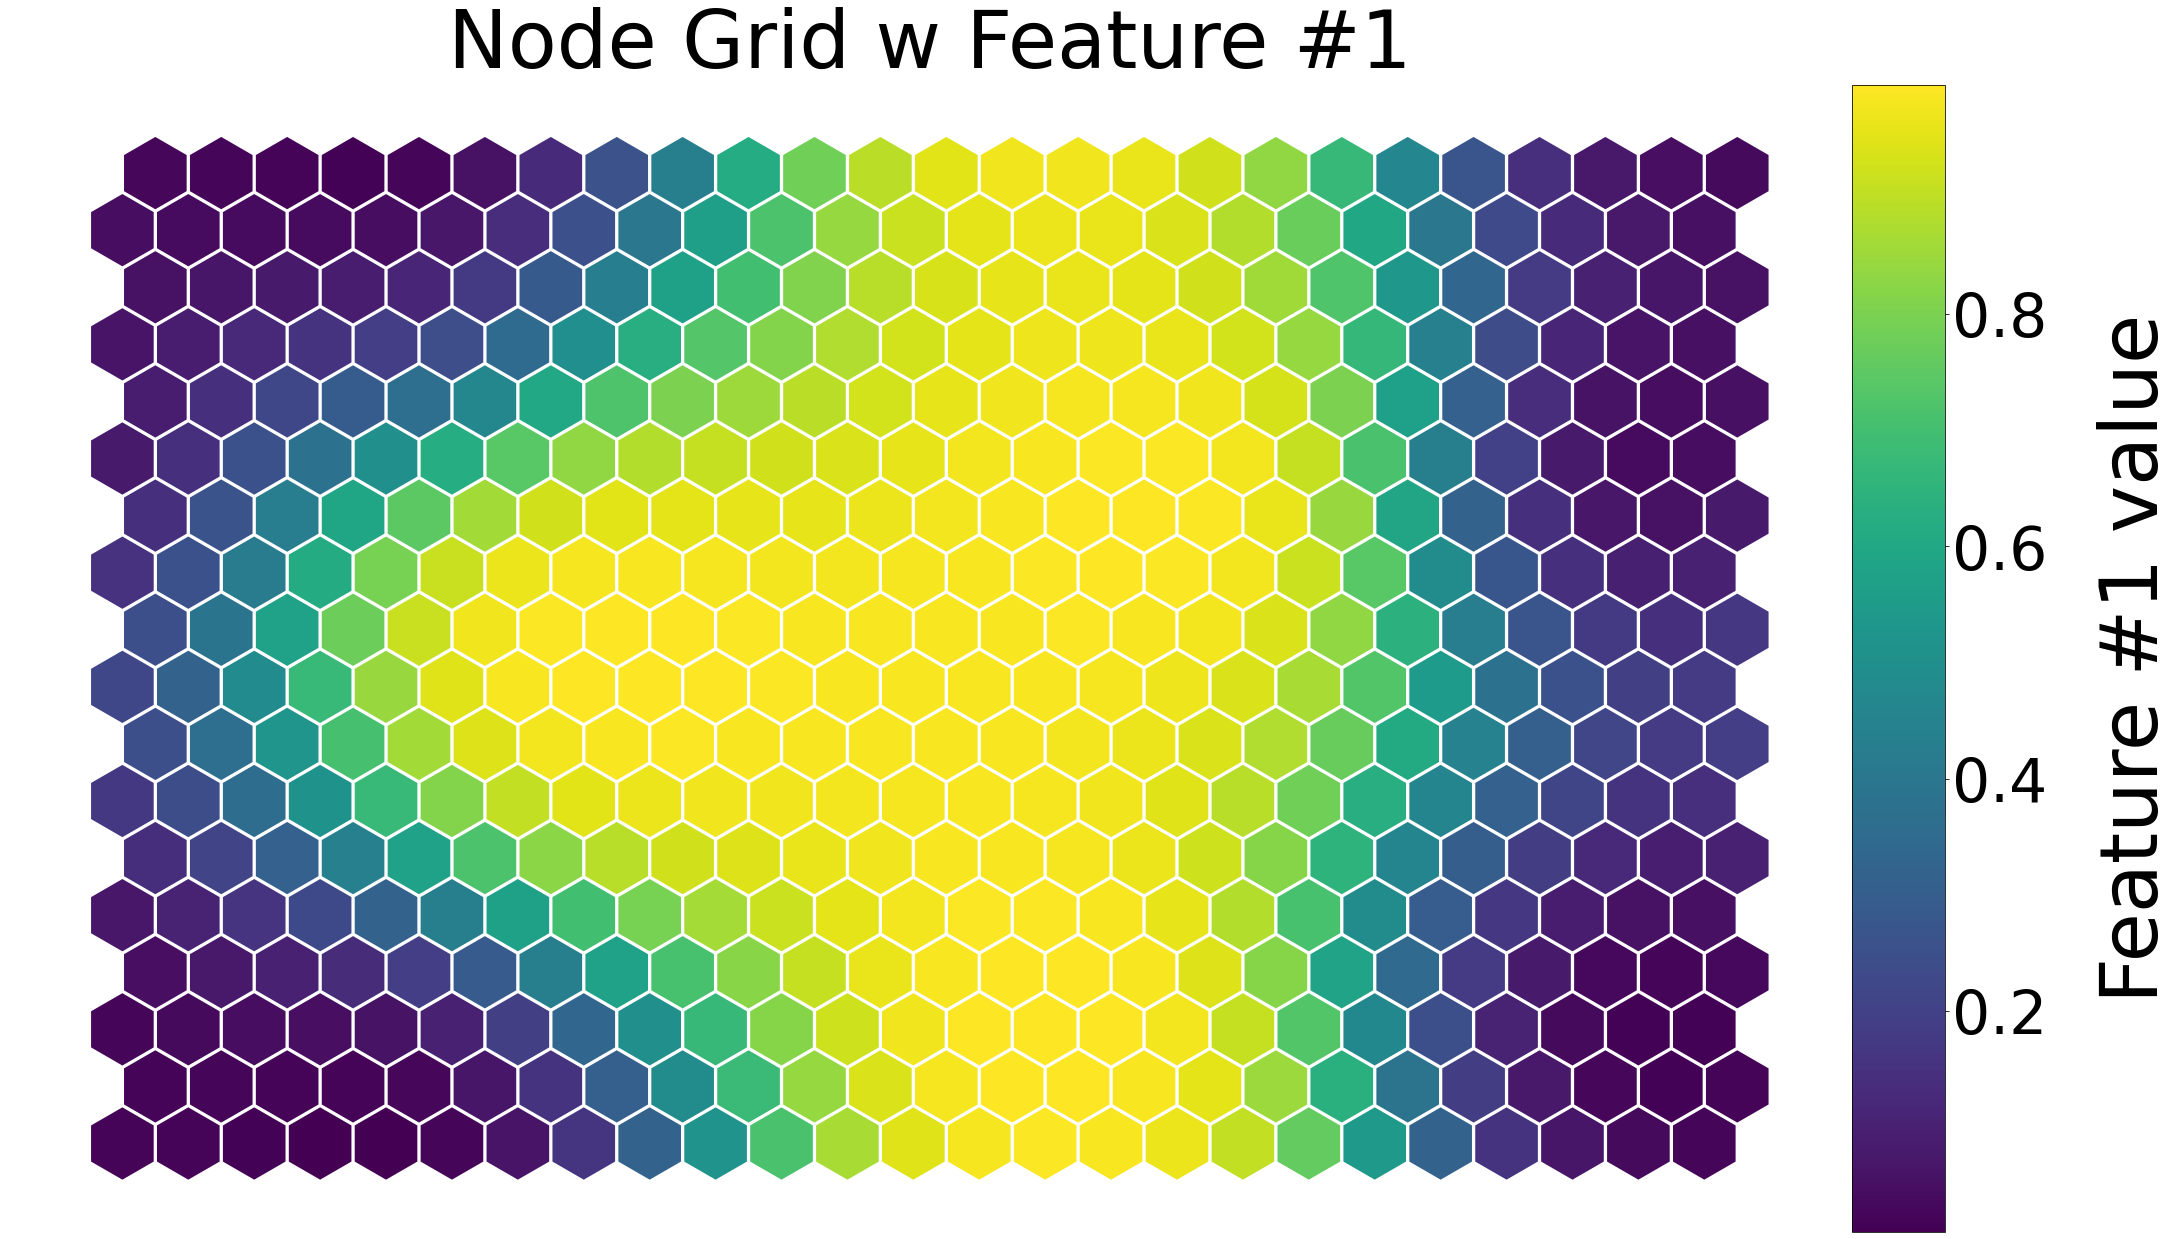

In [72]:
net.nodes_graph(colnum=1)

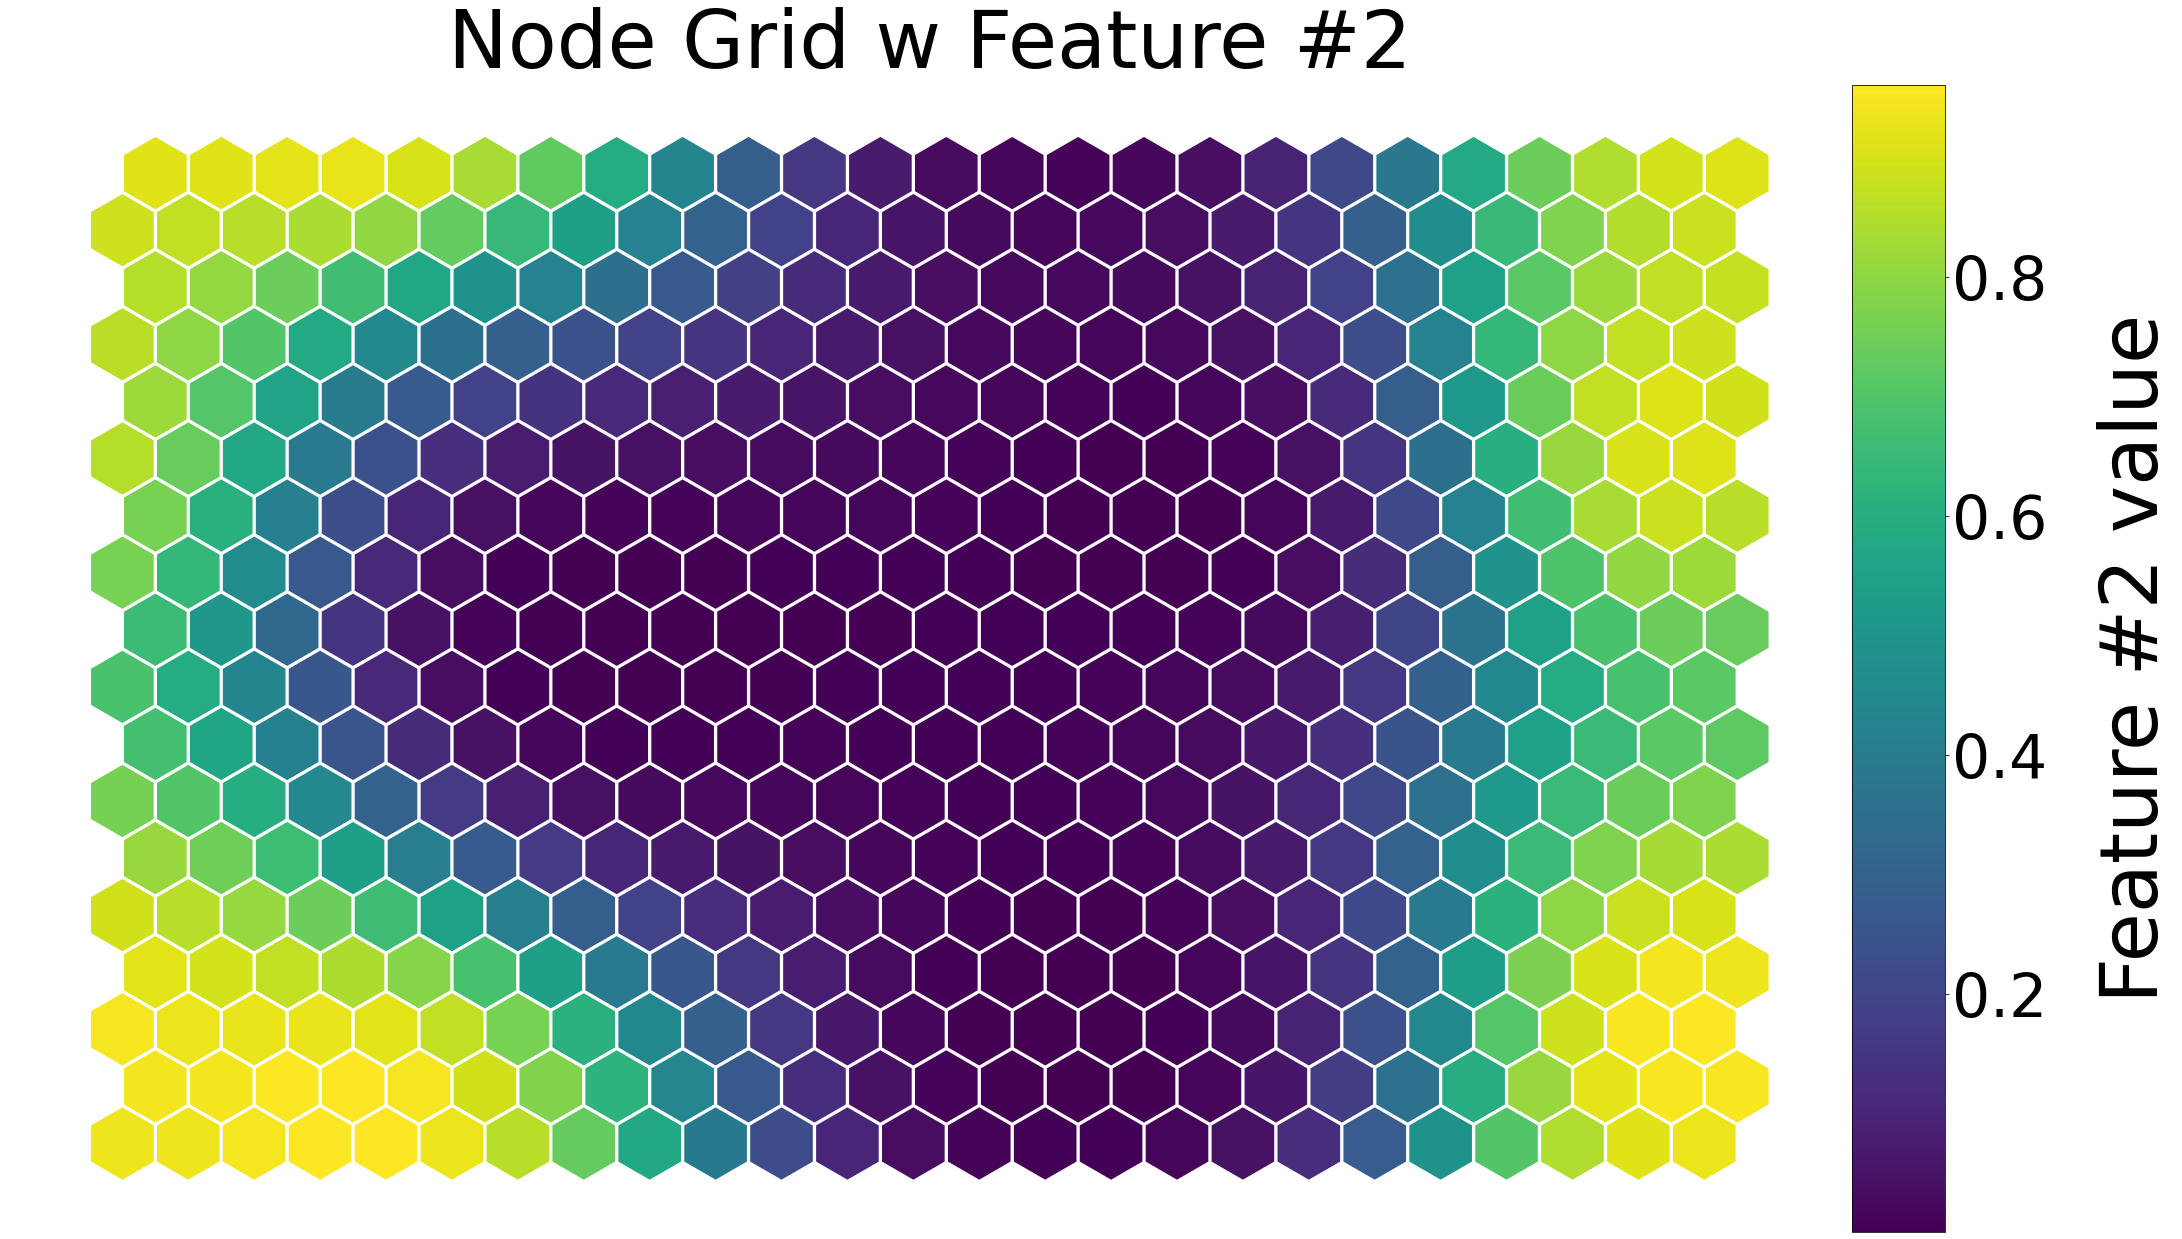

In [73]:
net.nodes_graph(colnum=2)

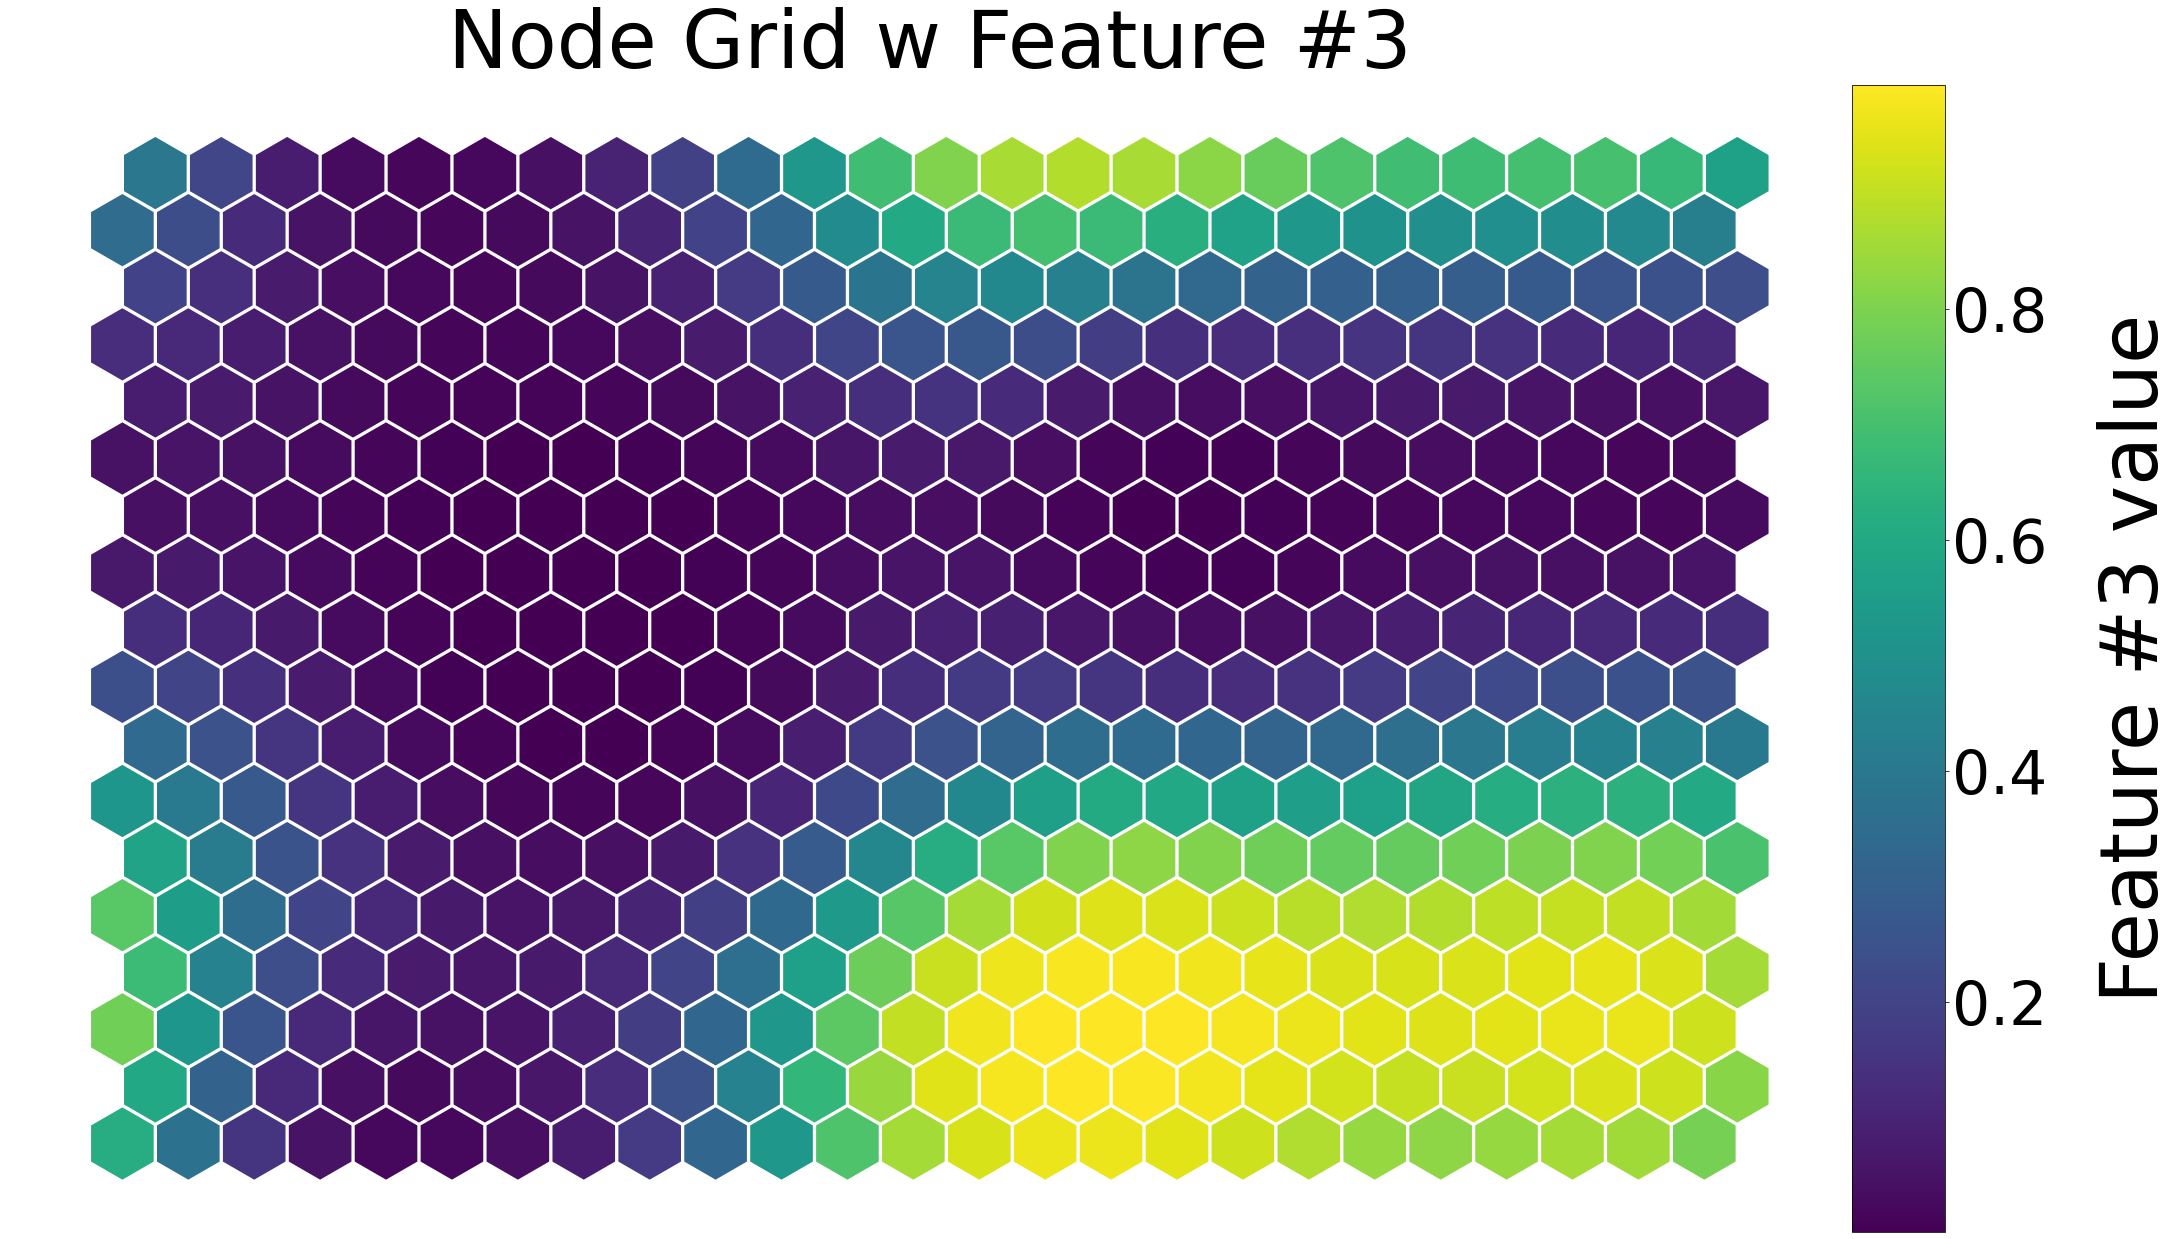

In [74]:
net.nodes_graph(colnum=3)

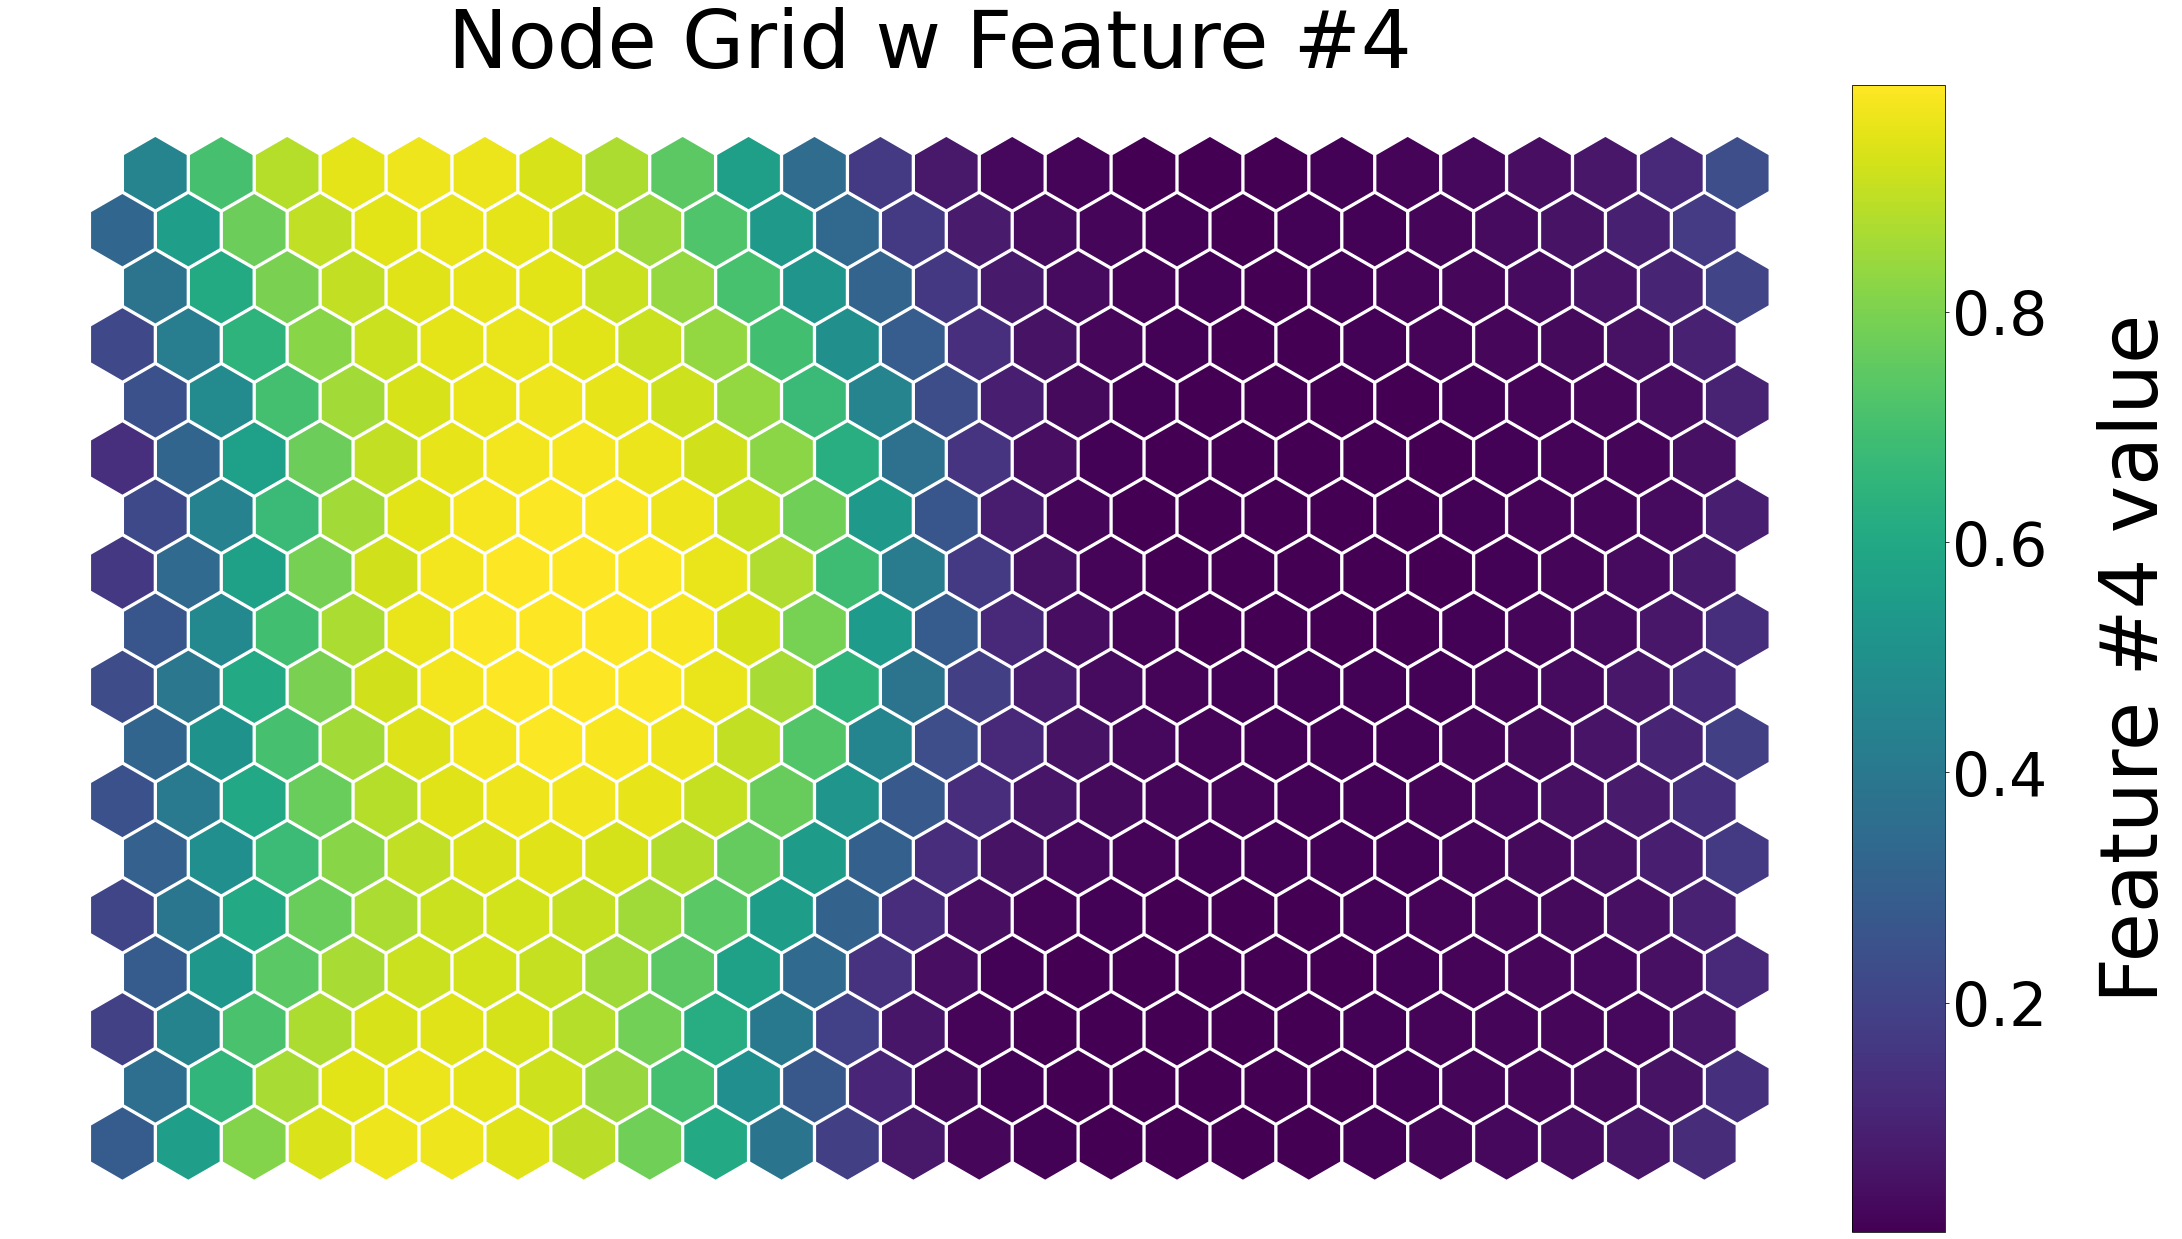

In [75]:
net.nodes_graph(colnum=4)

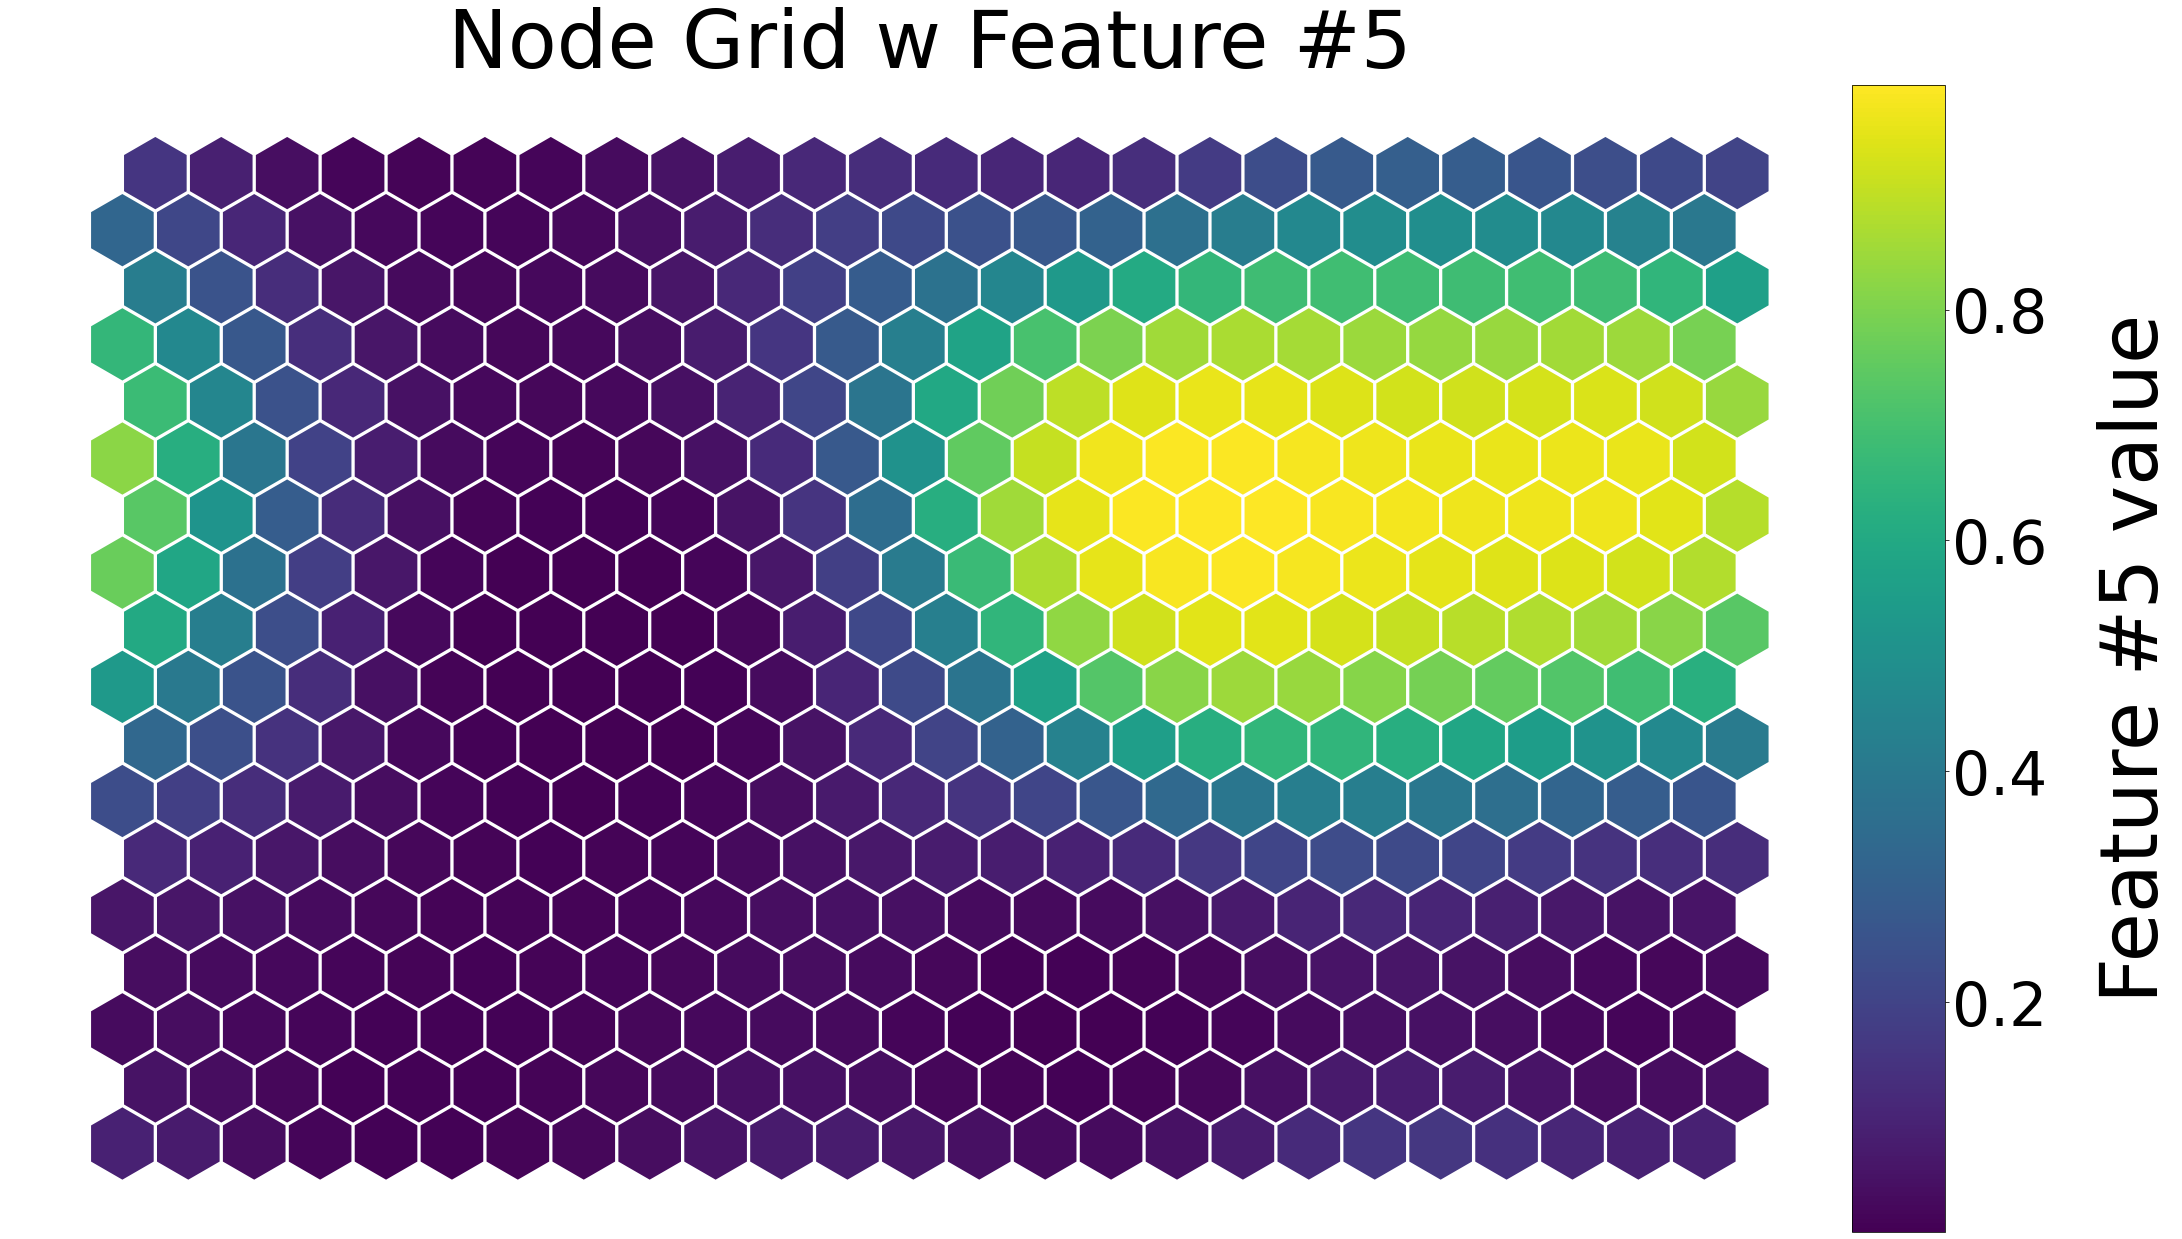

In [76]:
net.nodes_graph(colnum=5)

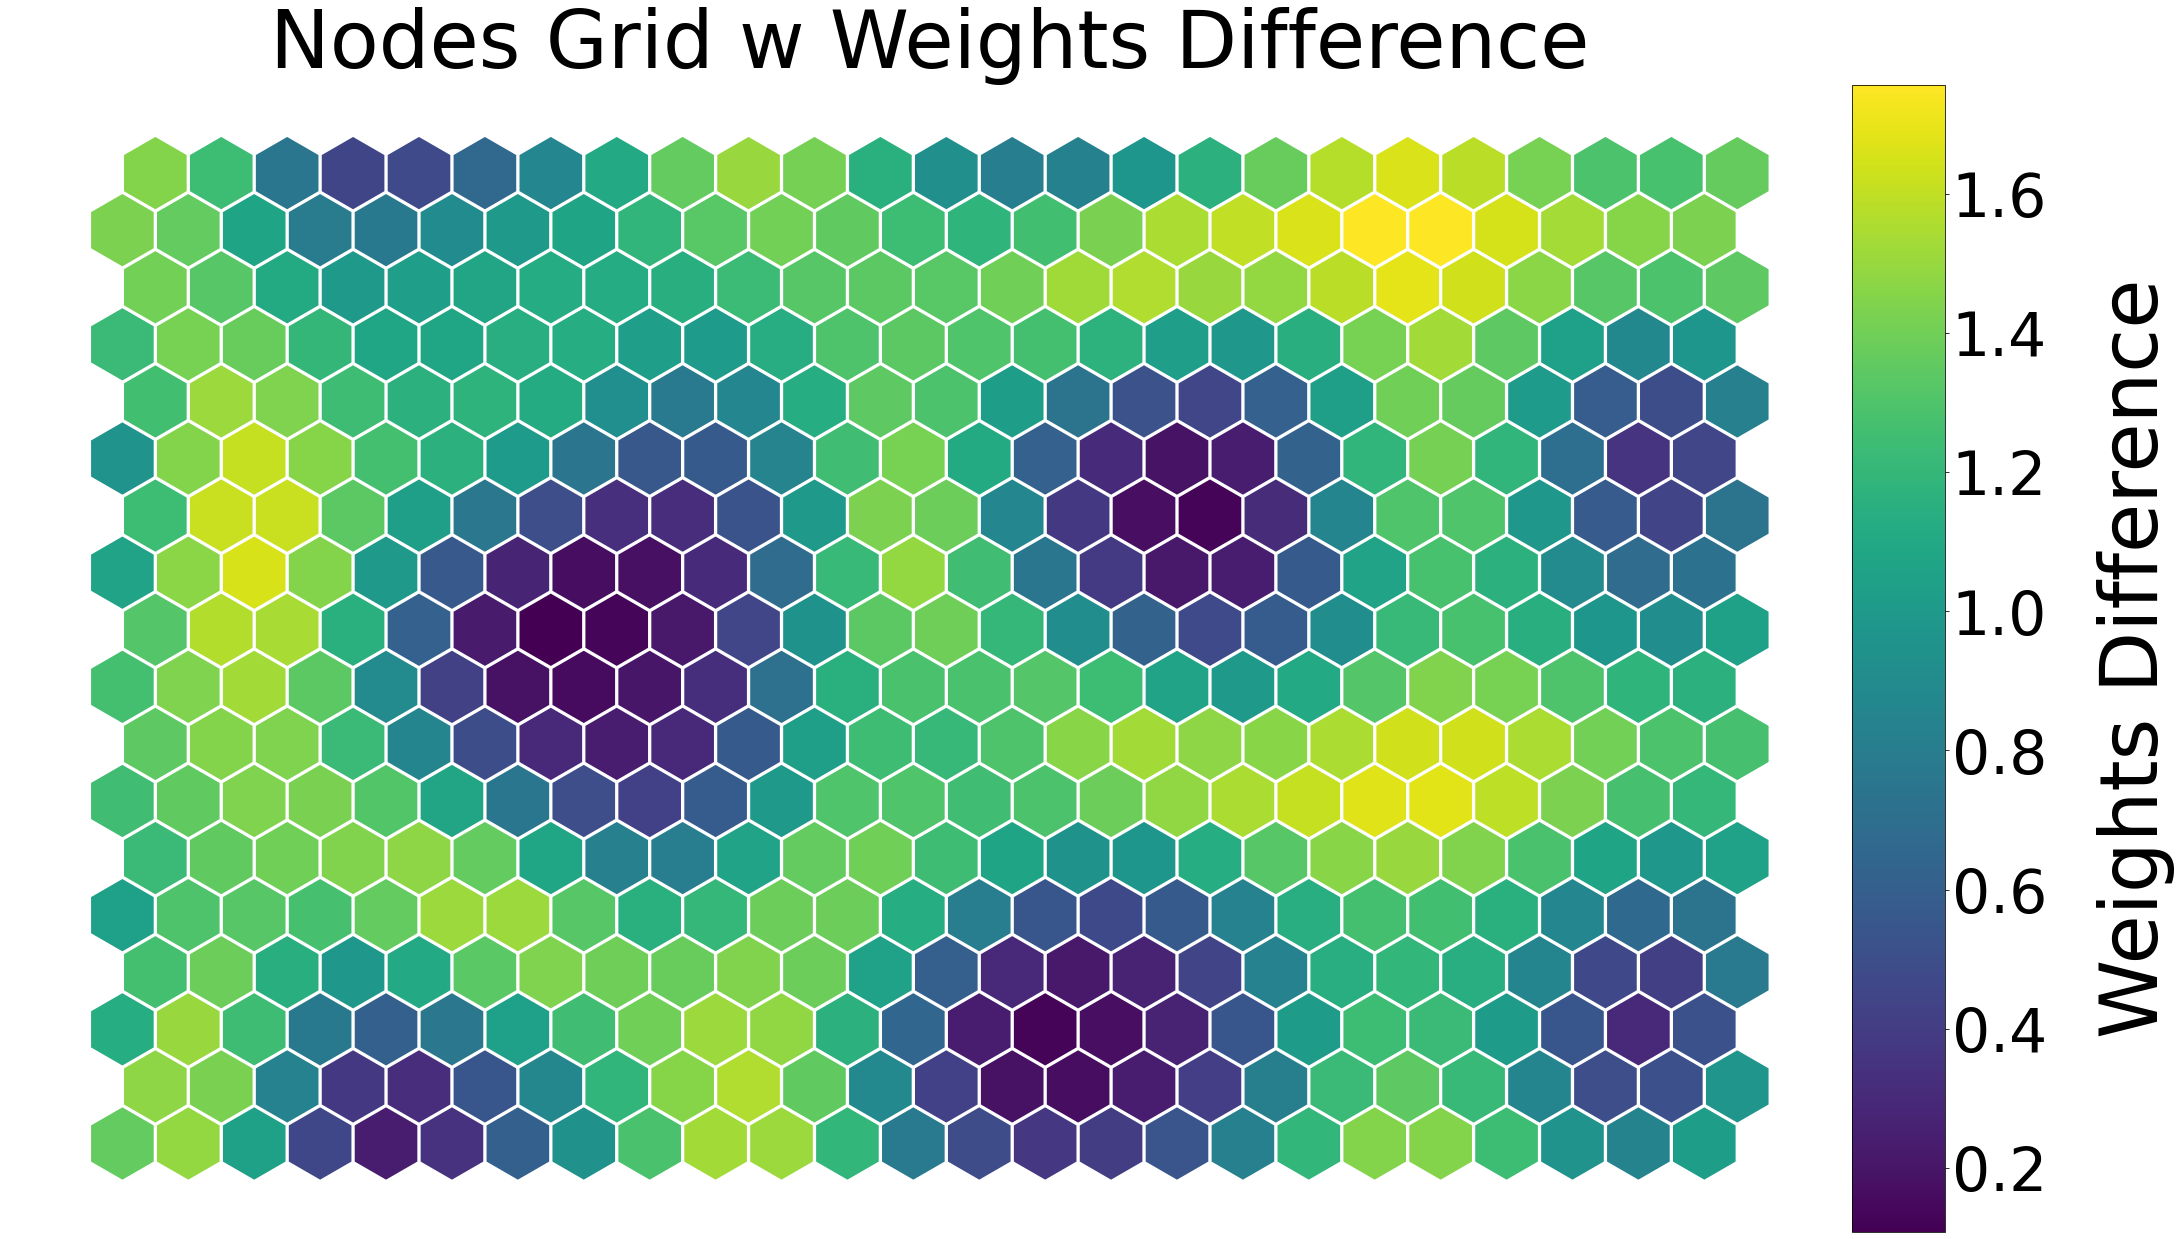

In [78]:
net.diff_graph()

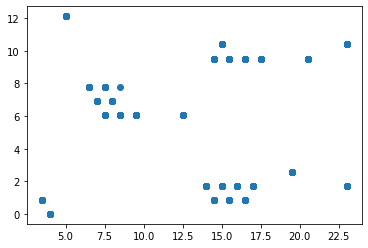

In [79]:
prj=np.array(net.project(X1))
plt.scatter(prj.T[0],prj.T[1])
plt.show()

In [103]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans2 = KMeans(n_clusters=2, random_state=0).fit(prj)

In [106]:
# Fitting kmeans to SOM
from sklearn.cluster import KMeans
kmeans3 = KMeans(n_clusters=3, random_state=0).fit(prj)

In [105]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc2,kmeans2.labels_)

0.0031263992173402875

In [107]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(km3,kmeans3.labels_)

0.9480932837166515

In [108]:
# Comparing Clustering Algorithms
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(hc3,kmeans3.labels_)

0.22385868461459266